<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

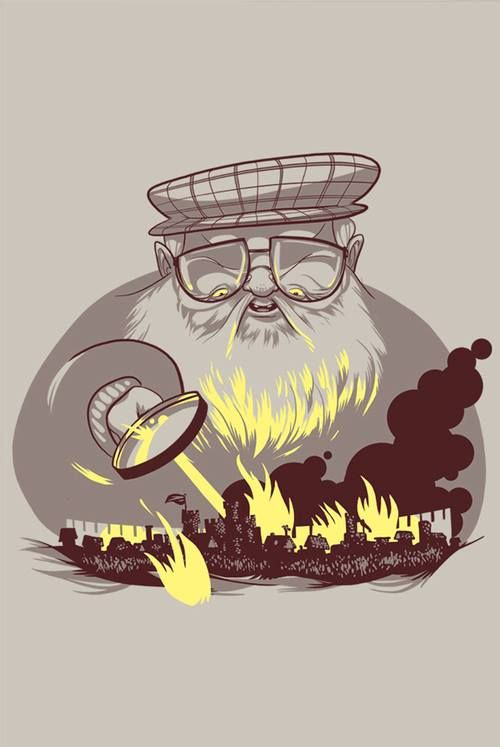

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Я выполнял всё локально, поэтому могут возникнуть конфликты при запуске в колабе.

### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [371]:
data_train = pd.read_csv("datasets/game_of_thrones_train.csv", index_col='S.No')
data_test = pd.read_csv("datasets/game_of_thrones_test.csv", index_col='S.No')
data_train.head()

name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   NaN     1       NaN          NaN   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1       NaN          NaN   
4              Aemma Arryn                 Queen     0       NaN         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   

                  mother            father                heir  \
S.No                                                             
1     Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2                    NaN               NaN                 NaN   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   
5                    NaN               NaN                 NaN   

               house               spouse  ...  isAliveMother  isAliveFather  \
S.No                                       ...                                 
1                NaN                  NaN  ...            1.0            0.0   
2         House Frey          Perra Royce  ...            NaN            NaN   
3        House Swyft                  NaN  ...            NaN            NaN   
4        House Arryn  Viserys I Targaryen  ...            NaN            NaN   
5     House Santagar      Eldon Estermont  ...            NaN            NaN   

      isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  \
S.No                                                                           
1             0.0            NaN          0        0   NaN                11   
2             NaN            1.0          1        1  97.0                 1   
3             NaN            NaN          0        1   NaN                 0   
4             NaN            0.0          1        1  23.0                 0   
5             NaN            1.0          1        1  29.0                 0   

      popularity  isAlive  
S.No                       
1       0.605351        0  
2       0.896321        1  
3       0.267559        1  
4       0.183946        0  
5       0.043478        1  

[5 rows x 25 columns]

### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [372]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [373]:
data_train.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Пропусков очень много. На самом деле ситуация удручающая....

С пропусками типа object ничего не поделать, их придётся удалить при большом количестве NaN. Также удалим isAliveMother/Father/Heir/Spouse

In [374]:
data_train.drop(columns=["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)
data_test.drop(columns=["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)

Object столбцы мы удалили. Теперь посмотрим, какие уникальные значения есть в тех колонках, в которых тоже есть пропуски. Возможно, их получится ловко заменить

In [375]:
data_train.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
house                381
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [376]:
data_train['culture'].dropna().unique()

array(['Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [377]:
data_train['title'].dropna().unique()

array(['Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackcrown'

In [378]:
data_train['house'].dropna().unique()

array(['House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerling', 

На самом деле, тут довольно много схожих строк. Их нужно будет объединить в одни и посмотреть на распределение.

#### culture

Сначала разберёмся с culture. Для этого создадим словарь и объединим часто встречающиеся культуры. Те, которые встречаются редко, объединим равномерно в минорные культуры.

In [379]:
data_train['culture'].dropna().value_counts()

culture
Northmen                   94
Ironborn                   91
Free Folk                  45
Braavosi                   39
Valyrian                   28
Dothraki                   17
Ghiscari                   17
Dornish                    17
Reach                      13
Vale mountain clans        12
Valemen                    10
Rivermen                   10
northmen                    9
Westerman                   8
Free folk                   7
Tyroshi                     6
Qartheen                    5
Astapori                    4
Stormlands                  4
Summer Isles                4
Westeros                    3
Dornishmen                  3
Northern mountain clans     3
Ironmen                     3
Westermen                   3
Crannogmen                  2
Myrish                      2
Sistermen                   2
Meereenese                  2
First Men                   2
westermen                   2
Lysene                      2
Dorne                       1
Wi

Посмотрим на изначальное распределение культур

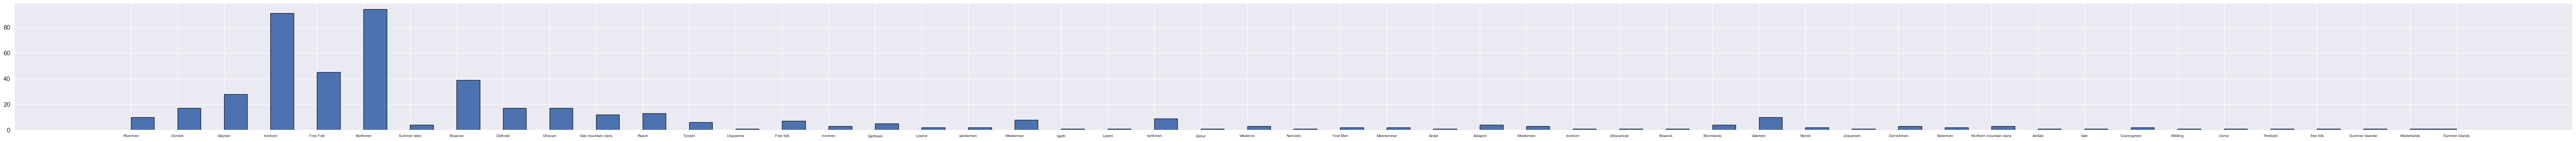

In [380]:
plt.figure(figsize=(100, 5))

plt.hist(data_train['culture'].dropna(), edgecolor='black', bins=100)

plt.xticks(fontsize=8)

plt.show()

In [381]:
cult = {
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Ironborn': ['ironborn', 'ironmen', 'Ironmen'],
    'Free Folk': ['free folk', 'Free folk'],
    'Valyrian': ['valyrian'],
    'Braavosi': ['braavosi', 'braavos'],
    'Ghiscari': ['ghiscari', 'ghiscaricari'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Dothraki': ['dothraki'],
    'Rivermen': ['rivermen'],
    'Valemen': ['valemen'],
    'Reach': ['the reach', 'reach', 'reachmen', 'The Reach', 'Reachmen'],
    'Valemountclans': ['vale mountain clans', 'Vale mountain clans'],
    'Westermen': ['Westeros', 'Western', 'Westerman', 'Westerlands', 'westermen'],
    'Stormmen': ['Stormlands', 'Stormlander'],
    'SummerIslemans': ['Summer Isles', 'Summer Islands', 'Summer Islander'],
    'Minor1': ['Tyroshi', 'Qartheen', 'Lysene', 'Crannogmen', 'Astapori'],
    'Minor2': ['Pentoshi', 'Meereenese', 'First Men', 'Lyseni'],
    'Minor3': ['Myrish', 'Wildling', 'Sistermen', 'Dorne', 'Lhazareen', 'Riverlands'],
    'Minor4': ['Wildlings', 'Asshai', 'Qohor', 'Astapor', 'Norvos', 'Meereen',
               "Asshai'i", 'Rhoynar'],
    'Minor5': ['Naathi', 'Ibbenese', 'Ghiscaricari', 'Vale',
               'Andals', 'Braavos', 'Andal', 'Norvoshi',
               'Qarth', 'Lhazarene']

}

# Создаем обратный словарь для замены
reverse_cult = {name: culture for culture, names in cult.items() for name in names}

# Заменяем значения в колонке culture
data_train['culture'] = data_train['culture'].replace(reverse_cult)
data_test['culture'] = data_test['culture'].replace(reverse_cult)

In [382]:
data_train['culture'].dropna().value_counts()

culture
Northmen          106
Ironborn           95
Free Folk          53
Braavosi           39
Valyrian           28
Minor1             19
Westermen          17
Dothraki           17
Ghiscari           17
Dornish            17
Reach              13
Valemountclans     12
Valemen            10
Rivermen           10
Minor5              8
Minor3              7
Minor2              6
SummerIslemans      6
Stormmen            4
Dornishmen          3
Minor4              1
Name: count, dtype: int64

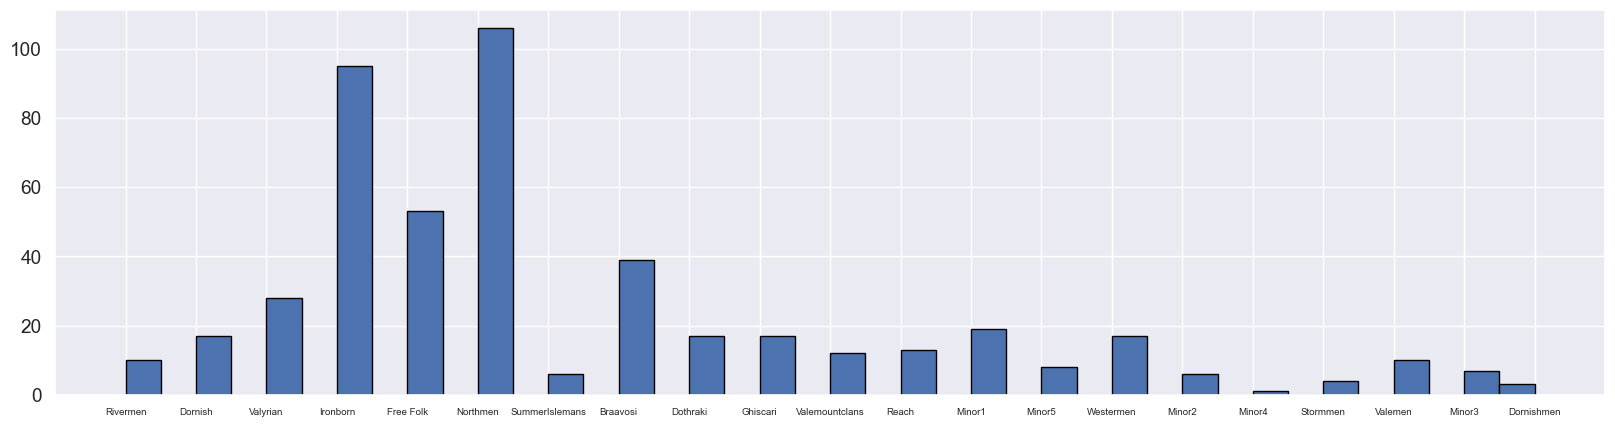

In [383]:
plt.figure(figsize=(20, 5))

plt.hist(data_train['culture'].dropna(), edgecolor='black', bins=40)

plt.xticks(fontsize=7)

plt.show()

Заменили успешно. Количество классов уменьшилось, распределение сохранилось

#### title

С оставшимися двумя признаками построить графики не получится ввиду большого количества классов

In [384]:
data_train['title'].dropna().value_counts()

title
Ser                   306
Maester                29
Archmaester            21
Lord                   19
Septon                 16
                     ... 
Sweetport Sound         1
Lord of Greyshield      1
Felwood                 1
Goldgrass               1
Highgarden              1
Name: count, Length: 195, dtype: int64

Для title и house я подготовил файлы со всеми возможными классами и их количеством в датасете. С помощью регулярного выражения я получаю количество данного класса и затем обрабатываю название класса 

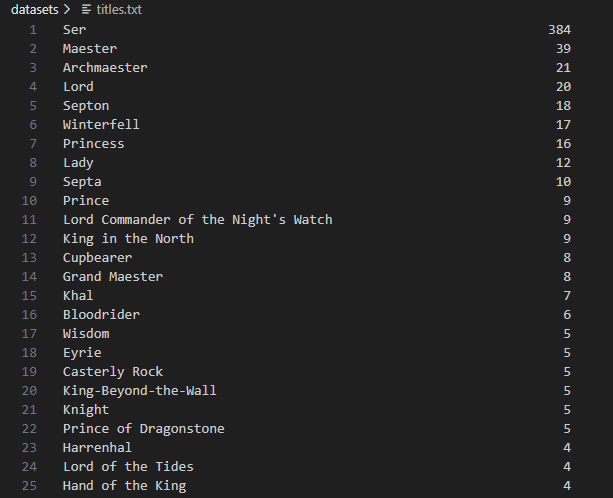

In [385]:
import re

In [386]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+', input_string)
    return [int(num) for num in numbers]


def create_title_dict(filename):
    title_dict = {}
    others = [] # полупокерские какие-то
    small_amount = [] # список для тех, кого мало

    with open(filename, 'r', encoding='utf-8') as file:
          for line in file:
            number = extract_numbers(line)[0]
            # Удаляем все цифры из строки
            clean_line = re.sub(r'\d+', '', line).strip()

            # Проверяем, что строка не пустая после удаления цифр
            if clean_line:
                # Разбиваем строку на части
                parts = clean_line.split()
                title = parts[0]


                # Если фамилия уже есть в словаре, добавляем полное имя в список
                if title in title_dict:
                    title_dict[title].append(clean_line)
                elif number > 6:
                    # Иначе создаем новый список с полным именем
                    title_dict[title] = [clean_line]
                elif len(parts) > 1 and number < 7:
                    # Иначе добавляем в список редковстречающихся
                    small_amount.append(clean_line)
                else:
                    # Иначе добавляем в список полупокеров
                    others.append(clean_line)

    if others:
        title_dict['invalid_entries'] = others
    if small_amount:
        title_dict['small_amount'] = small_amount

    return title_dict

In [387]:
filename = 'datasets/titles.txt'
title_dictionary = create_title_dict(filename)
# Создаем обратный словарь для замены
reverse_title = {new_title: title for title, names in title_dictionary.items() for new_title in names}

# Заменяем значения в колонке title
data_train['title'] = data_train['title'].replace(reverse_title)
data_test['title'] = data_test['title'].replace(reverse_title)

#### house

делаем всё то же самое для house

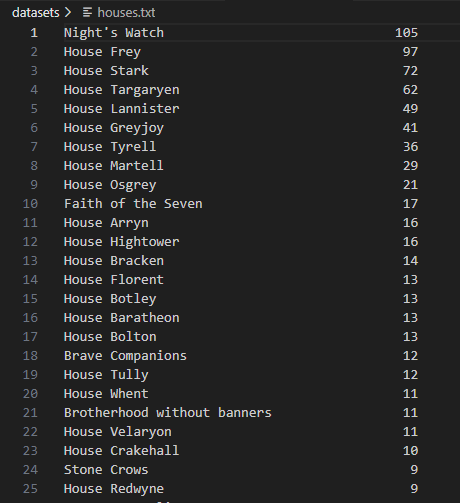

In [388]:
def extract_numbers(input_string):
    numbers = re.findall(r'\d+', input_string)
    return [int(num) for num in numbers]


def create_house_dict(filename):
    house_dict = {}
    small_amount = [] # список для тех, кого мало

    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:

          number = extract_numbers(line)[0]
          # Удаляем все цифры из строки
          clean_line = re.sub(r'\d+', '', line).strip()

          # Проверяем, что строка не пустая после удаления цифр
          if clean_line:
              # Разбиваем строку на части
              parts = clean_line.split()

              # Проверяем частоту этого дома
              if number > 5:
                  if len(parts) == 2:
                      house, house_name = parts
                      if house != 'House':
                          house_name = house
                      # Если дом уже есть в словаре, добавляем в список
                      if house_name in house_dict:
                          house_dict[house_name].append(clean_line)
                      else:
                          # Иначе создаем новый список
                          house_dict[house_name] = [clean_line]
              else:
                    small_amount.append(clean_line)
                    
    if small_amount:
        house_dict['small_amount'] = small_amount

    return house_dict

In [389]:
filename = 'datasets/houses.txt'
house_dictionary = create_house_dict(filename)
# Создаем обратный словарь для замены
reverse_house = {new_house: house for house, names in house_dictionary.items() for new_house in names}

# Заменяем значения в колонке name
data_train['house'] = data_train['house'].replace(reverse_house)
data_test['house'] = data_test['house'].replace(reverse_house)

Заменили успешно. Количество классов уменьшилось, распределение (может быть) сохранилось

Удалим все пропуски. Ничего особенного по их замене я не придумал, да и смысла наверное нет...Поэтому заменяю модой. Распределение, естественно, поплывёт

In [390]:
data_train['culture'].fillna(data_train['culture'].mode()[0], inplace=True)
data_train['house'].fillna(data_train['house'].mode()[0], inplace=True)
data_train['title'].fillna(data_train['title'].mode()[0], inplace=True)

C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\1001005794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['culture'].fillna(data_train['culture'].mode()[0], inplace=True)
C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\1001005794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [391]:
data_test['culture'].fillna(data_test['culture'].mode()[0], inplace=True)
data_test['house'].fillna(data_test['house'].mode()[0], inplace=True)
data_test['title'].fillna(data_test['title'].mode()[0], inplace=True)

C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\3040566280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['culture'].fillna(data_test['culture'].mode()[0], inplace=True)
C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\3040566280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [392]:
import numpy as np

In [393]:
data_train['isPopular'] = np.where(data_train['popularity'] > 0.5, 1, 0)

data_train['boolDeadRelations'] = np.where(data_train['numDeadRelations'] > 0, 1, 0)

data_train.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

data_test['isPopular'] = np.where(data_test['popularity'] > 0.5, 1, 0)

data_test['boolDeadRelations'] = np.where(data_test['numDeadRelations'] > 0, 1, 0)

data_test.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

### **Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [394]:
data_train.isna().sum()

name                    0
title                   0
male                    0
culture                 0
dateOfBirth          1278
house                   0
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isMarried               0
isNoble                 0
age                  1278
isAlive                 0
isPopular               0
boolDeadRelations       0
dtype: int64

In [395]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book2              1557 non-null   int64  
 8   book3              1557 non-null   int64  
 9   book4              1557 non-null   int64  
 10  book5              1557 non-null   int64  
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  age                279 non-null    float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   int32  
 16  boolDeadRelations  1557 non-n

Ну вообще говоря без матрицы корреляции тяжело сказать, какие признаки нужны, а какие нет. Странная последовательность заданий в ноутбуке...

In [396]:
num_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations']

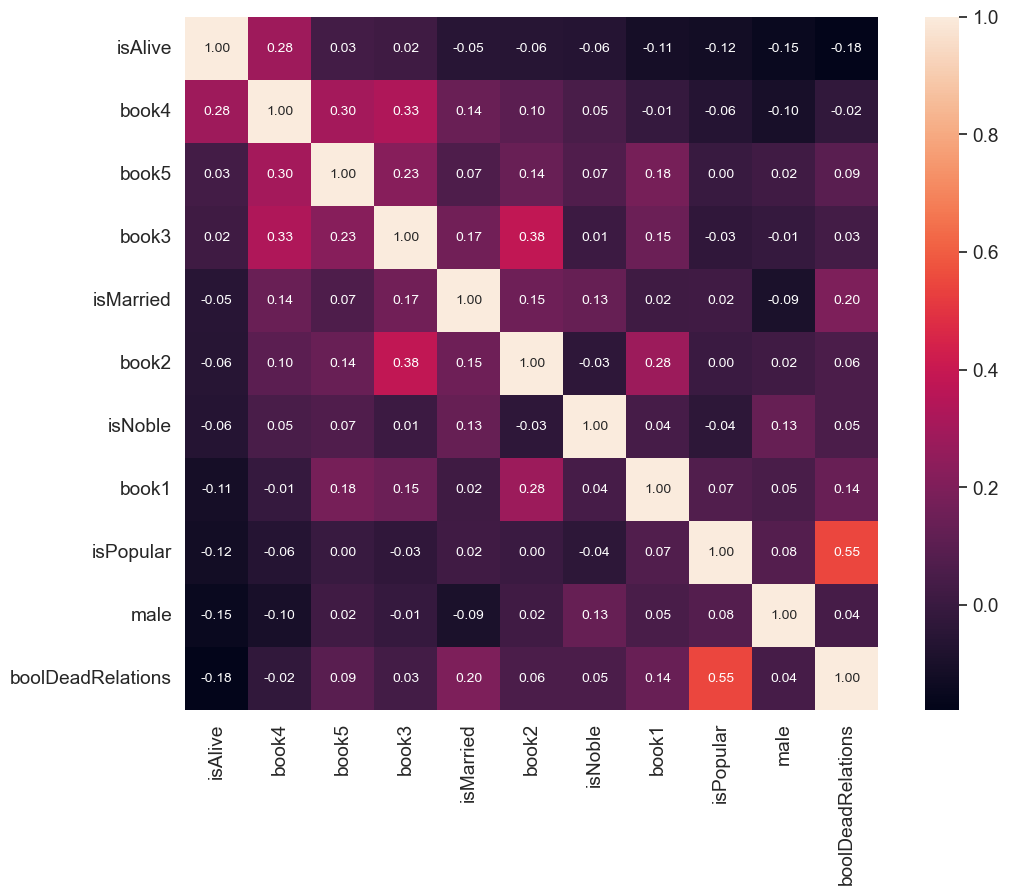

In [397]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 13
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Видим коррелирующие между собой признаки:
1. isPopular с boolDeadRelations
2. book4 с book3 и book5

так как is Popular меньше коррелирует с целевой переменной, дропнем её...
p.s да, можно устроить танцы с PCA, но мне честно говоря лень...

In [398]:
data_train.drop(columns=['isPopular'], inplace = True)
data_test.drop(columns=['isPopular'], inplace = True)

С книгами уже интереснее. Попробуем включить логику и подумать, при появлении в каких книгах вероятнее всего герой жив. Сделаем новый признак на основании своих размышлений

In [399]:
# Условие для maybeAlive
data_train['maybeAlive'] = 0  # Изначально заполняем колонку нулями

# Условие для присвоения значения 1
data_train.loc[(data_train['book1'] == 0) & (data_train['book2'] == 0) & ((data_train['book3'] == 1) |
        (data_train['book4'] == 1) | (data_train['book5'] == 1)) |
         ((data_train['book1'] == 1) & (data_train['book2'] == 1) & (data_train['book3'] == 1)) &
          (data_train['book4'] == 1) & (data_train['book5']==1), 'maybeAlive'] = 1
# Условие для присвоения значения 0
data_train.loc[((data_train['book1'] == 1) | (data_train['book2'] == 1) | (data_train['book3'] == 1)) &
          ((data_train['book4'] == 0)), 'maybeAlive'] = 0


# Условие для maybeAlive
data_test['maybeAlive'] = 0  # Изначально заполняем колонку нулями

# Условие для присвоения значения 1
data_test.loc[(data_test['book1'] == 0) & (data_test['book2'] == 0) &
              ((data_test['book3'] == 1) | (data_test['book4'] == 1) |
               (data_test['book5'] == 1)) |
              ((data_test['book1'] == 1) & (data_test['book2'] == 1) &
               (data_test['book3'] == 1)) & (data_test['book4'] == 1) &
                (data_test['book5']==1), 'maybeAlive'] = 1
# Условие для присвоения значения 0
data_test.loc[((data_test['book1'] == 1) | (data_test['book2'] == 1) |
              (data_test['book3'] == 1)) & ((data_test['book4'] == 0)),
              'maybeAlive'] = 0

Теперь можно дропнуть все эти книжные признаки

In [400]:
data_train.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)
data_test.drop(columns=['book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)

Построим ещё раз матрицу корреляции

In [401]:
num_columns = ['male', 'maybeAlive', 'isMarried', 'isNoble', 'isAlive', 'boolDeadRelations']

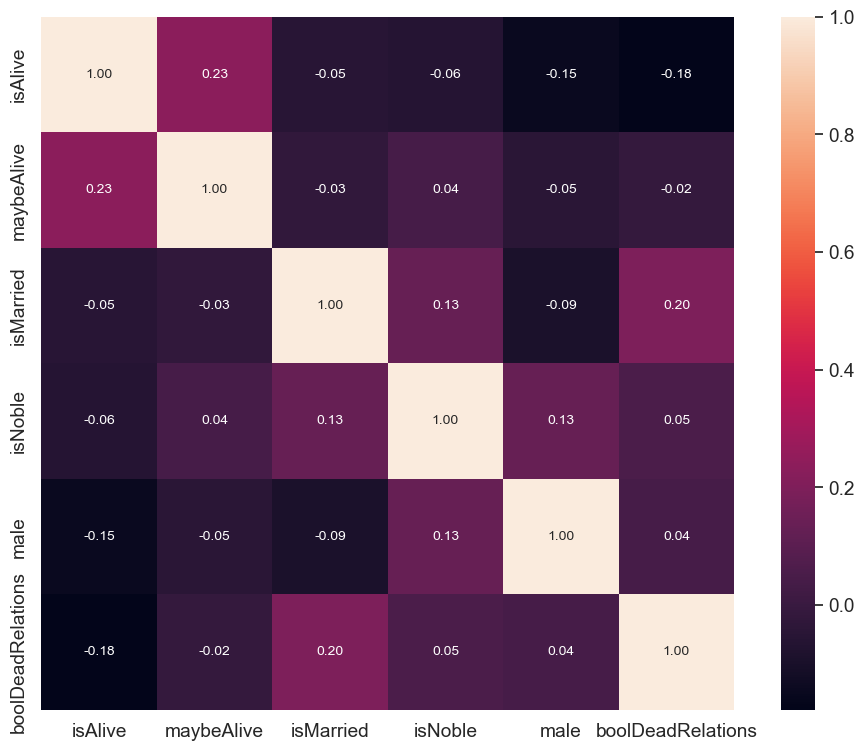

In [402]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 6
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Думаю, пока хватит

### **Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [403]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                279 non-null    float64
 9   isAlive            1557 non-null   int64  
 10  boolDeadRelations  1557 non-null   int32  
 11  maybeAlive         1557 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 152.1+ KB


Целевая переменная - isAlive - количественная

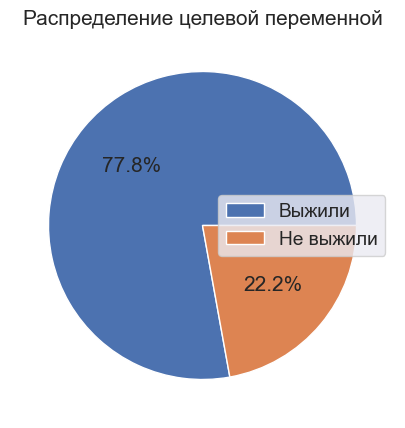

In [404]:
plt.figure(figsize=(7, 5))
plt.pie(data_train['isAlive'].value_counts(), autopct='%1.1f%%')
plt.legend(['Выжили', 'Не выжили'])
plt.title('Распределение целевой переменной')
plt.show()

Датасет несбалансирован. Увы, ничего с этим делать не буду...

### **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

#### Категориальные признаки

In [405]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   isMarried          1557 non-null   int64  
 7   isNoble            1557 non-null   int64  
 8   age                279 non-null    float64
 9   isAlive            1557 non-null   int64  
 10  boolDeadRelations  1557 non-null   int32  
 11  maybeAlive         1557 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 152.1+ KB


У нас 4 категориальных признака. С именем увы ничего не поделать - его дропнем.

In [406]:
data_train.drop(columns='name', inplace=True)
data_test.drop(columns='name', inplace=True)

Теперь подумаем, как закодировать оставшиеся. В каждом признаке много классов, так что one-hot сразу отпадает. Label encoding тоже сомнительная затея. Остаются:
1. Target Encoding - заменяет категории числовыми значениями, основанными на целевой переменной. Для каждой категории вычисляется среднее значение целевой переменной, и это значение используется как новый числовой признак.
2. Frequency Encoding - преобразует категории в числовые значения, основанные на частоте их появления в данных. Каждой категории присваивается числовое значение, которое соответствует частоте ее встречаемости в данных.

Из этих двух мне больше нравится первый вариант. Так мы получим хорошую корреляцию с целевой переменной.

In [407]:
from sklearn.preprocessing import TargetEncoder

In [408]:
categorical_features = ['culture', 'house', 'title']

In [409]:
targetencoder = TargetEncoder() # используем все параметры по умолчанию

#data_train_X = data_train.drop(columns='isAlive')
data_train_X = data_train[categorical_features]
data_train_y = data_train['isAlive']

data_train_X_transformed = targetencoder.fit_transform(data_train_X, data_train_y)

data_test_transformed = targetencoder.transform(data_test[categorical_features])


In [410]:
data_train_X_transformed

array([[0.77801526, 0.81976653, 0.79513669],
       [0.60630568, 0.90952237, 0.73567686],
       [0.78154504, 1.        , 0.7945487 ],
       ...,
       [0.78154504, 0.48241406, 0.7945487 ],
       [0.7192737 , 0.81188118, 0.78974836],
       [0.78134745, 0.80799622, 0.79627807]])

In [411]:
data_train_X_transformed_df = pd.DataFrame(data_train_X_transformed, 
                                           columns=targetencoder.get_feature_names_out(categorical_features),
                                           index=data_train.index)
data_train_X_transformed_df

culture     house     title
S.No                              
1     0.778015  0.819767  0.795137
2     0.606306  0.909522  0.735677
3     0.781545  1.000000  0.794549
4     0.781347  0.680673  0.758123
5     0.924558  0.808981  0.761069
...        ...       ...       ...
1553  0.781545  0.809118  1.000000
1554  0.781347  0.807996  0.796278
1555  0.781545  0.482414  0.794549
1556  0.719274  0.811881  0.789748
1557  0.781347  0.807996  0.796278

[1557 rows x 3 columns]

In [412]:
data_test_transformed_df = pd.DataFrame(data_test_transformed, 
                                           columns=targetencoder.get_feature_names_out(categorical_features),
                                           index=data_test.index)
data_test_transformed_df

culture     house     title
S.No                              
1558  0.780424  0.811559  0.793181
1559  1.000000  0.811559  0.793181
1560  0.780424  0.756073  0.793181
1561  0.780424  0.811559  0.793181
1562  0.606334  0.898167  0.793181
...        ...       ...       ...
1942  0.548912  0.768049  0.793181
1943  0.780424  0.826836  0.793181
1944  0.780424  0.811559  0.793181
1945  0.780424  0.811559  0.793181
1946  0.780424  0.697219  0.697099

[389 rows x 3 columns]

In [413]:
data_train.drop(columns=categorical_features, inplace=True)

In [414]:
data_test.drop(columns=categorical_features, inplace=True)

In [415]:
data_train = pd.concat([data_train, data_train_X_transformed_df], axis=1)
data_train

male  dateOfBirth  isMarried  isNoble   age  isAlive  boolDeadRelations  \
S.No                                                                            
1        1          NaN          0        0   NaN        0                  1   
2        1        208.0          1        1  97.0        1                  1   
3        1          NaN          0        1   NaN        1                  0   
4        0         82.0          1        1  23.0        0                  0   
5        0        276.0          1        1  29.0        1                  0   
...    ...          ...        ...      ...   ...      ...                ...   
1553     1          NaN          0        1   NaN        1                  0   
1554     0          NaN          0        0   NaN        0                  0   
1555     1          NaN          0        0   NaN        0                  0   
1556     0        283.0          0        0  22.0        1                  0   
1557     0        264.0          0        0  12.0        0                  0   

      maybeAlive   culture     house     title  
S.No                                            
1              0  0.778015  0.819767  0.795137  
2              1  0.606306  0.909522  0.735677  
3              1  0.781545  1.000000  0.794549  
4              0  0.781347  0.680673  0.758123  
5              1  0.924558  0.808981  0.761069  
...          ...       ...       ...       ...  
1553           0  0.781545  0.809118  1.000000  
1554           0  0.781347  0.807996  0.796278  
1555           0  0.781545  0.482414  0.794549  
1556           0  0.719274  0.811881  0.789748  
1557           1  0.781347  0.807996  0.796278  

[1557 rows x 11 columns]

In [416]:
data_test = pd.concat([data_test, data_test_transformed_df], axis=1)
data_test

male  dateOfBirth  isMarried  isNoble    age  boolDeadRelations  \
S.No                                                                    
1558     0        156.0          0        0  100.0                  0   
1559     0          NaN          0        0    NaN                  0   
1560     0          NaN          0        0    NaN                  0   
1561     1          NaN          0        1    NaN                  0   
1562     1        262.0          1        0   38.0                  0   
...    ...          ...        ...      ...    ...                ...   
1942     1          NaN          0        0    NaN                  0   
1943     1          NaN          0        0    NaN                  0   
1944     1          NaN          0        0    NaN                  0   
1945     1          NaN          0        0    NaN                  0   
1946     1        220.0          1        1   47.0                  1   

      maybeAlive   culture     house     title  
S.No                                            
1558           1  0.780424  0.811559  0.793181  
1559           0  1.000000  0.811559  0.793181  
1560           1  0.780424  0.756073  0.793181  
1561           1  0.780424  0.811559  0.793181  
1562           1  0.606334  0.898167  0.793181  
...          ...       ...       ...       ...  
1942           1  0.548912  0.768049  0.793181  
1943           0  0.780424  0.826836  0.793181  
1944           1  0.780424  0.811559  0.793181  
1945           1  0.780424  0.811559  0.793181  
1946           1  0.780424  0.697219  0.697099  

[389 rows x 10 columns]

#### Количественные признаки

Замечательно. Теперь ещё раз посмотрим на матрицу корреляции

In [417]:
num_columns = ['male', 'maybeAlive', 'isMarried', 'isNoble', 'isAlive', 'boolDeadRelations', 'culture', 'house', 'title']

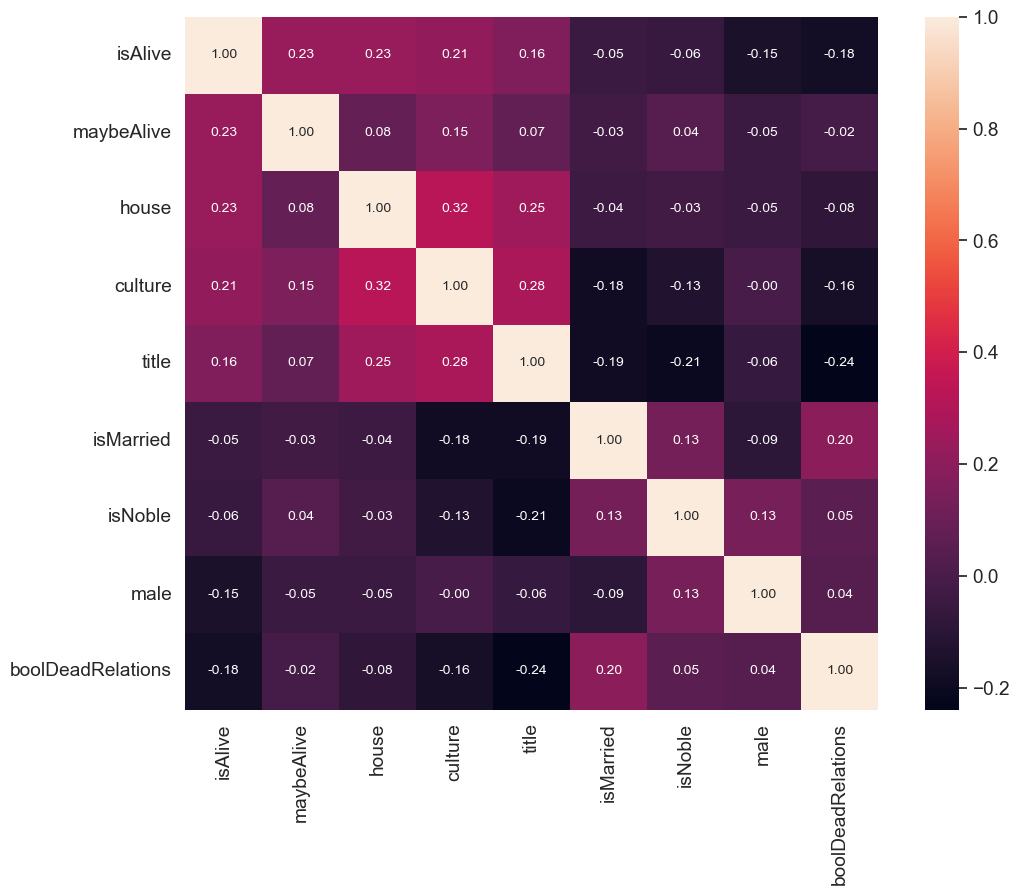

In [418]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 9
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

В целом корреляция между title, house и culture вполне ожидаема ввиду способа их кодирования. Попробую два раза обучить модель с удалением коррелирующих между собой признаков и без удаления

Теперь самое интересное. У нас есть признаки dateOfBirth и Age. Если бы я не делал этот блокнот полгода назад, я бы, честно говоря, никогда не задумался о том, что эти признаки вообще говоря имеют прямое соответствие с целевой переменной

Посмотрим на распределения этих признаков

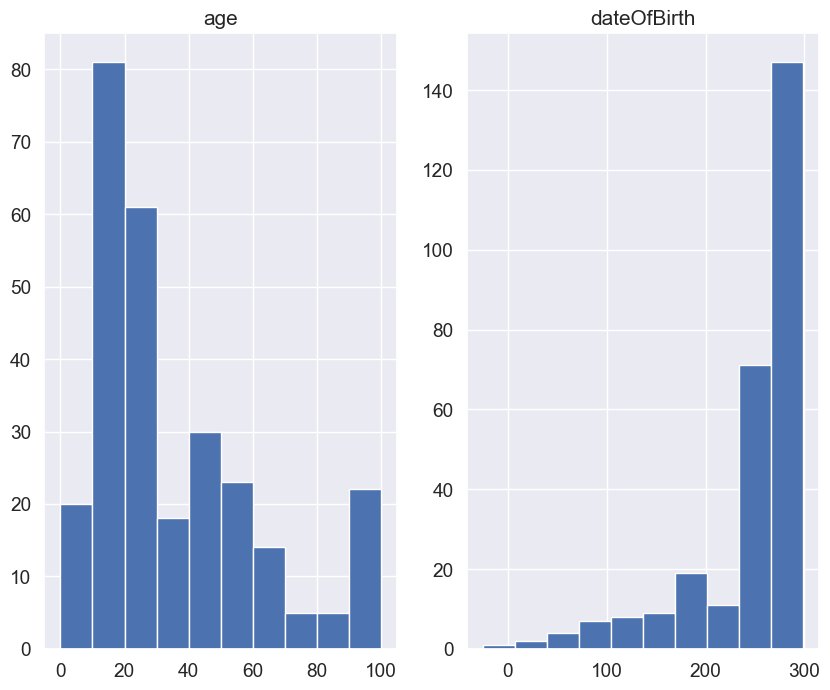

In [419]:
data_age = data_train['age']
data_dateOfBirth = data_train['dateOfBirth'] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.hist(data_age)
ax2.hist(data_dateOfBirth)

ax1.set_title('age')
ax2.set_title('dateOfBirth')

plt.show()

Теперь посмотрим на зависимость каждого этого признака и целевой переменной

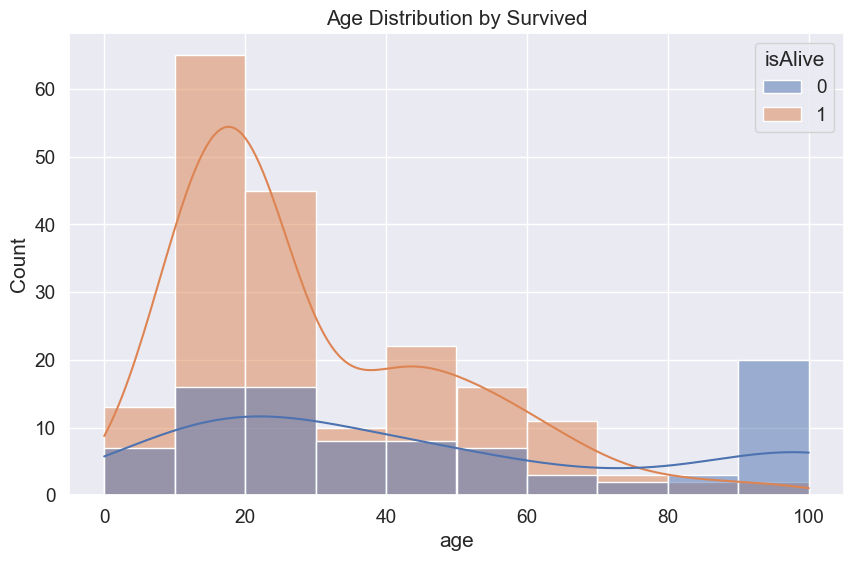

In [420]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

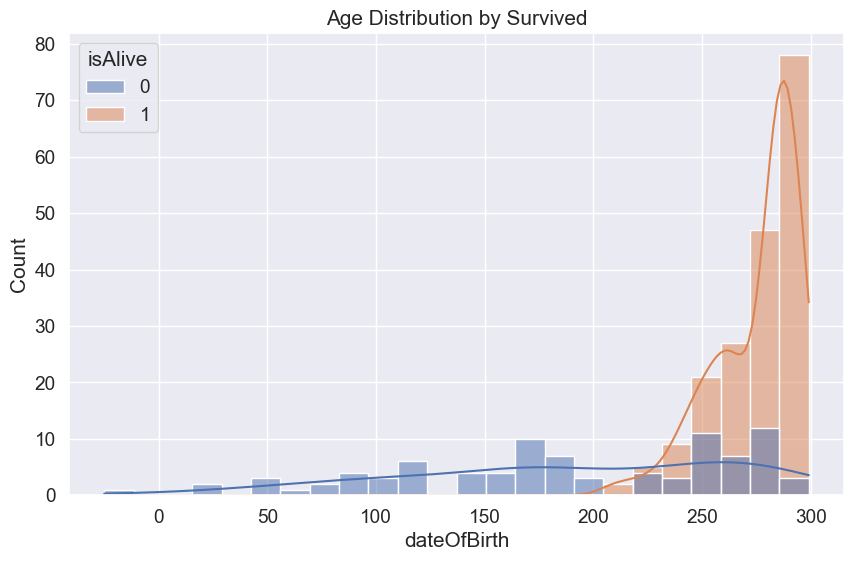

In [421]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train, x='dateOfBirth', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

Ну и ChatGPT подтверждает наши предположения. Если возраст больше определённого, то скорее всего герой мёртв

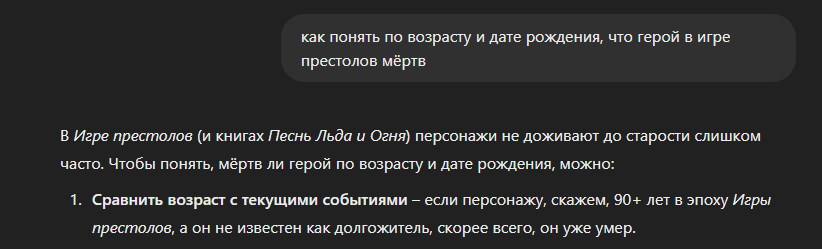

Оставим только признак age, так как они друг друга дублируют

In [422]:
data_train.drop(columns='dateOfBirth', inplace=True)
data_test.drop(columns='dateOfBirth', inplace=True)

Но у нас всё ещё куча NaNов в этом признаке. Как мы видели выше, заполнять модой или медианой не совсем корректно, всё-таки пропусков довольно много. Попробуем заполнить предсказаниями модели

In [423]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [424]:
data_for_age = data_train.dropna(subset='age')
data_for_age.drop(columns='isAlive', inplace=True)

X = data_for_age.drop(['age'], axis=1)
y = data_for_age['age']

# Обучаем модель
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.1)
model = RandomForestRegressor(random_state=42)

# Определяем параметры для GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 75, 100, 150, 200],
    'max_depth': [2, 5, 10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['log2', 'sqrt']
}

# Настроим GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=7, 
                           scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1)

# Обучаем на обучающих данных
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Best parameters:", grid_search.best_params_)

# Оценка модели на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Выводим метрики модели
mse = r2_score(y_test, y_pred)
print("R2 on Test Set:", mse)

C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\4049791003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_age.drop(columns='isAlive', inplace=True)


Fitting 7 folds for each of 2100 candidates, totalling 14700 fits
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 20}
R2 on Test Set: -0.10593814608758145


На всякий сохраню модель)

In [335]:
import pickle

filename = 'second_model_for_age_predict.sav'
pickle.dump(model, open(filename, 'wb'))

Делаем предсказания на пропущенных значениях

In [425]:
X = data_train.drop(columns=['age', 'isAlive'], axis=1)

y_pred = best_model.predict(X)
y_pred_series = pd.Series(y_pred)

c:\Users\mserg\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [426]:
data_train['age'].fillna(y_pred_series, inplace=True)

C:\Users\mserg\AppData\Local\Temp\ipykernel_7076\2992483928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['age'].fillna(y_pred_series, inplace=True)


Смотрим на итоговое распределение

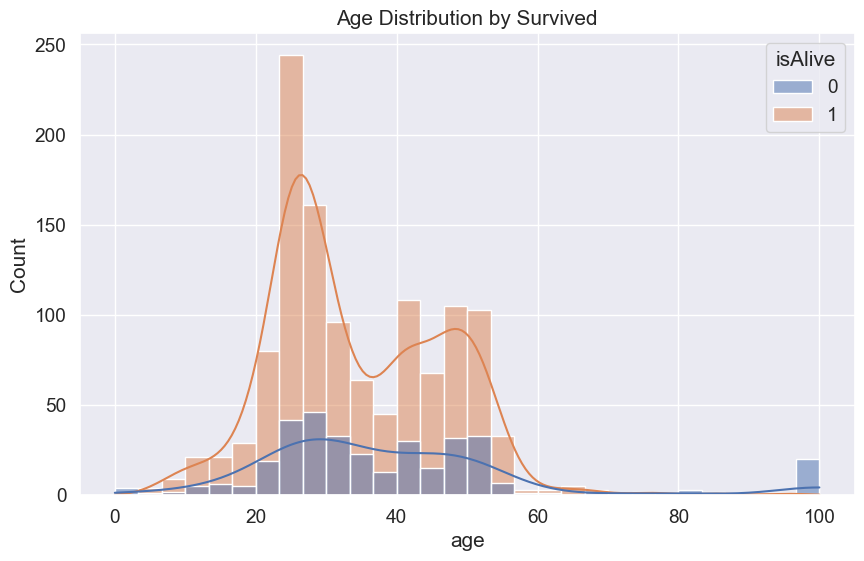

In [427]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by Survived')
#plt.xlim(180, 310)
plt.show()

Убеждаемся, что пропусков нет

In [428]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   isMarried          1557 non-null   int64  
 2   isNoble            1557 non-null   int64  
 3   age                1557 non-null   float64
 4   isAlive            1557 non-null   int64  
 5   boolDeadRelations  1557 non-null   int32  
 6   maybeAlive         1557 non-null   int64  
 7   culture            1557 non-null   float64
 8   house              1557 non-null   float64
 9   title              1557 non-null   float64
dtypes: float64(4), int32(1), int64(5)
memory usage: 127.7 KB


Посмотрим на распределение в test части

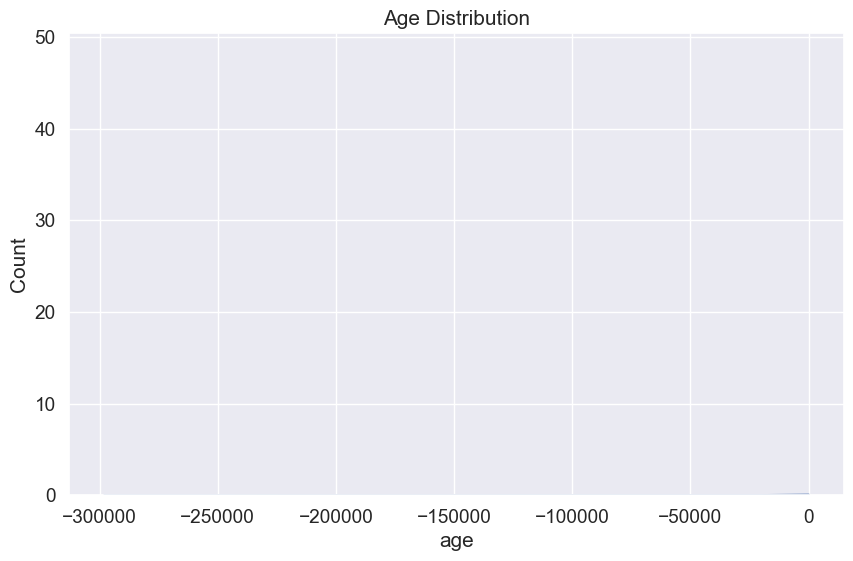

In [429]:
plt.figure(figsize=(10, 6))
sns.histplot(data_test, x='age', kde=True)
plt.title('Age Distribution')
#plt.xlim(180, 310)
plt.show()

В test части какая-то беда есть в данных. Сюрприз от авторов курса :)

In [430]:
for _ in range(2):
  data_test['age'] = data_test['age'].replace(data_test['age'].min(), 20)

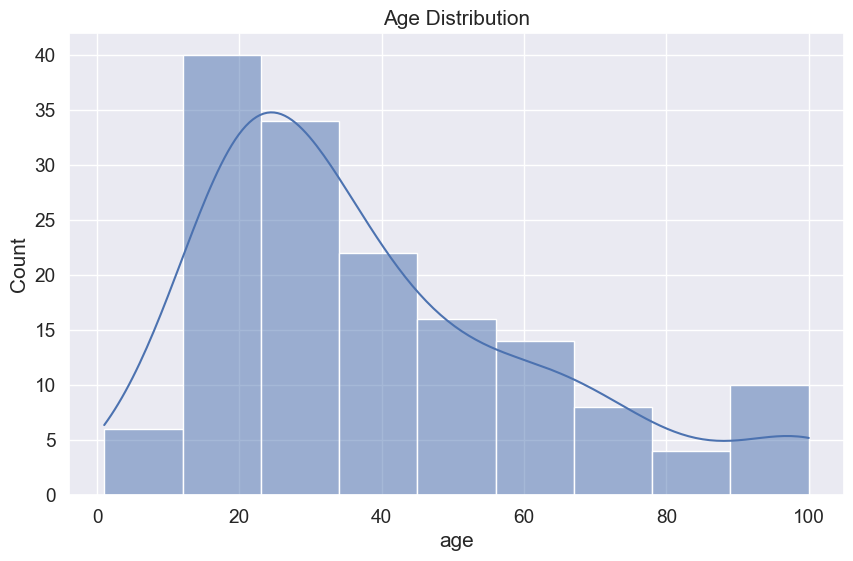

In [431]:
plt.figure(figsize=(10, 6))
sns.histplot(data_test, x='age', kde=True)
plt.title('Age Distribution')
#plt.xlim(180, 310)
plt.show()

Распределение в целом похожее. Можно делать предсказания

Делаем предсказания на test части

In [432]:
X = data_test.drop(columns=['age'], axis=1)

y_pred = best_model.predict(X)
y_pred_series = pd.Series(y_pred)
y_pred_series.index = data_test.index

c:\Users\mserg\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [433]:
data_test['age'] = data_test['age'].fillna(y_pred_series)

Смотрим на результат

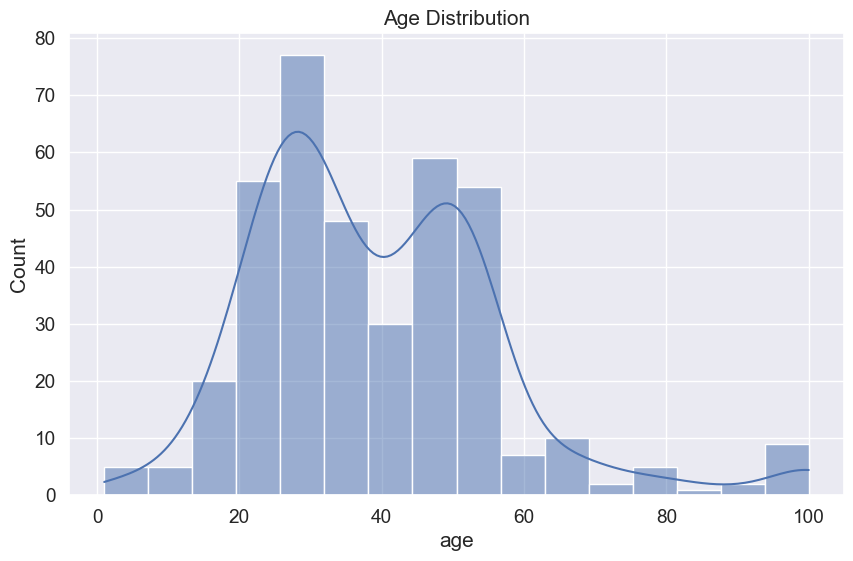

In [434]:
plt.figure(figsize=(10, 6))
sns.histplot(data_test, x='age', kde=True)
plt.title('Age Distribution')
#plt.xlim(180, 310)
plt.show()

Вроде норм

Теперь можно строить полную матрицу корреляции

### **Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [435]:
num_columns = ['male', 'maybeAlive', 'isMarried', 'isNoble', 'isAlive', 'boolDeadRelations', 'culture', 'house', 'title', 'age']

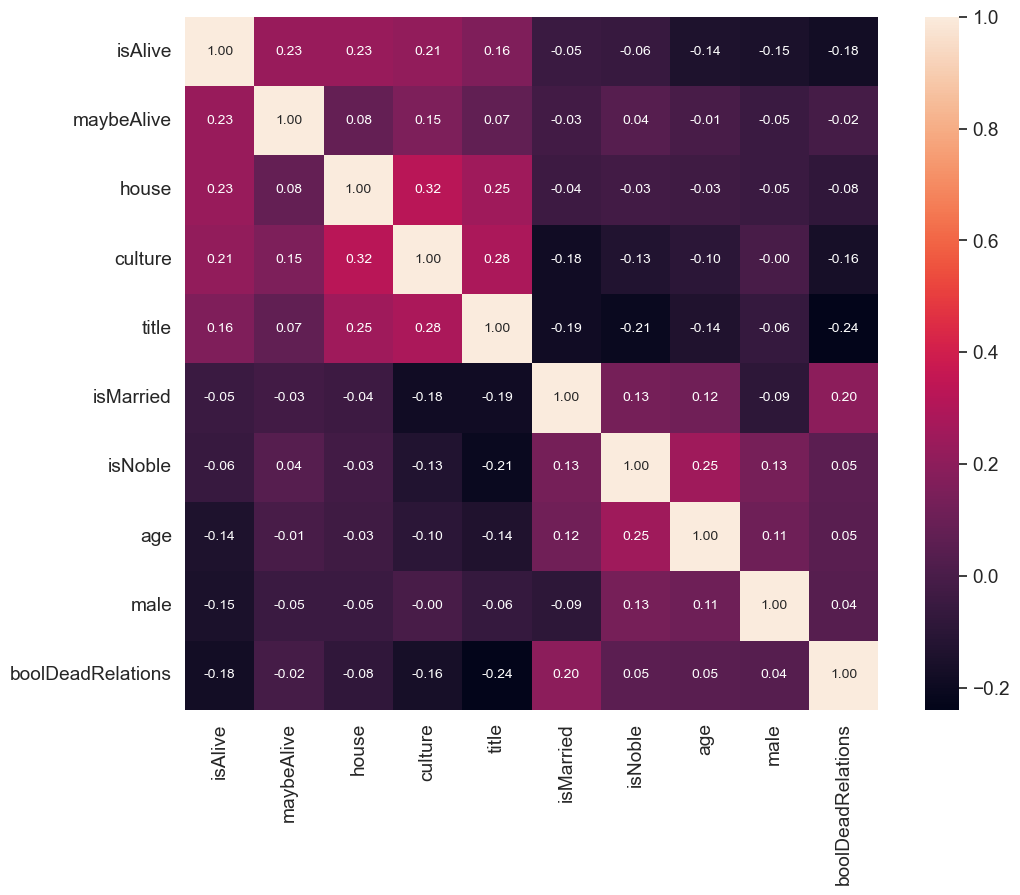

In [436]:
corrmat = data_train[num_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 10
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_train[num_columns][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

В итоге не особо он и коррелирует с целевой переменной :) ну посмотрим, что в итоге будет

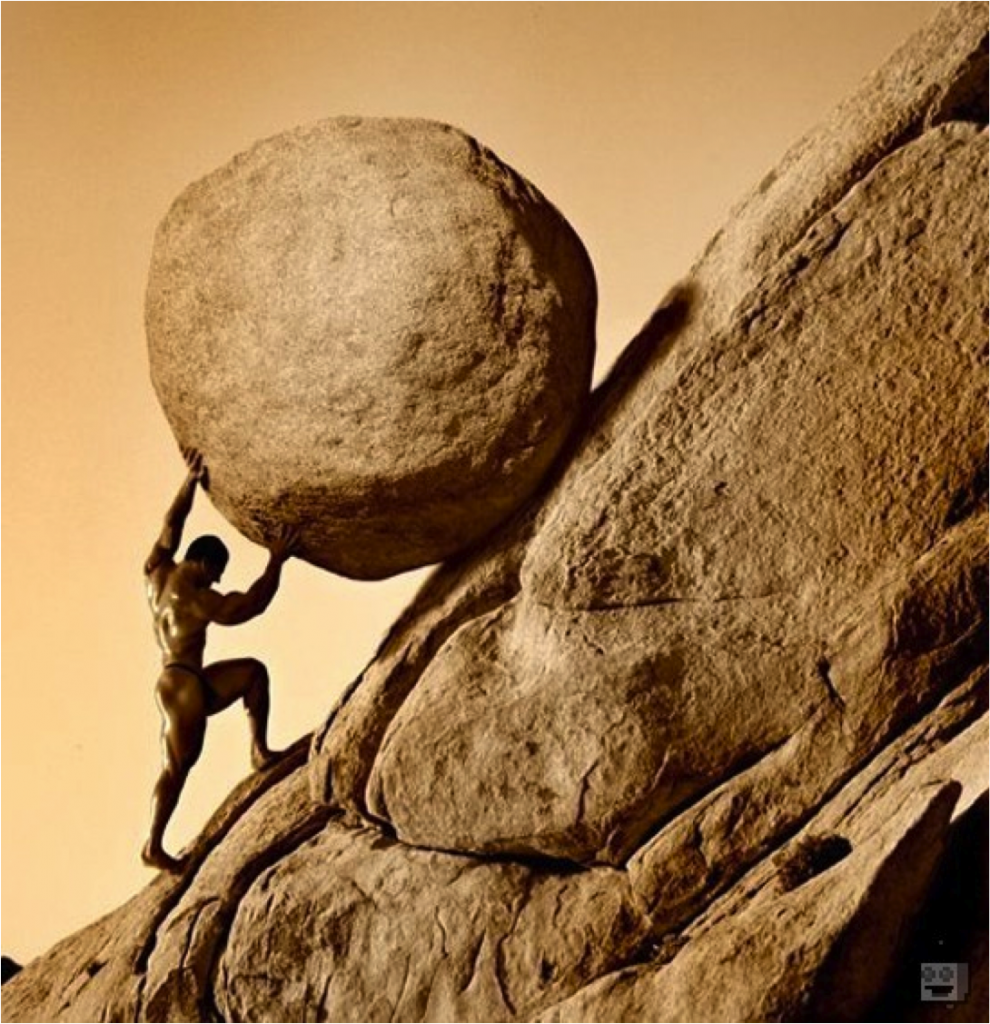

In [437]:
data_test.isna().sum()

male                 0
isMarried            0
isNoble              0
age                  0
boolDeadRelations    0
maybeAlive           0
culture              0
house                0
title                0
dtype: int64

### **Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [438]:
X = data_train.drop(columns='isAlive')
y = data_train['isAlive']

### **Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [439]:
from sklearn.model_selection import train_test_split

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

### **Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [441]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [442]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

Хорошим тоном будет заскейлить данные, чтобы моделькам было чуть проще

In [443]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

`LogisticRegression`

In [445]:
model = LogisticRegression()

param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs','liblinear', 'newton-cg',
                   'newton-cholesky', 'sag','saga'],
        'max_iter': [10, 50, 75, 100],
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=7,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

logistic_regression = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, logistic_regression.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, logistic_regression.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, logistic_regression.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, logistic_regression.predict(X_test_scaled))}')

Fitting 7 folds for each of 120 candidates, totalling 840 fits
{'C': 1, 'max_iter': 10, 'solver': 'sag'}
MSE train = 0.19678714859437751
MSE test = 0.18269230769230768
MAE train = 0.19678714859437751
MAE test = 0.18269230769230768


c:\Users\mserg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


`AdaBoost`

In [ ]:
model = AdaBoostClassifier()

param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'algorithm': ['SAMME.R', 'SAMME']
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

adaboost = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, adaboost.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, adaboost.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, adaboost.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, adaboost.predict(X_test_scaled))}')

grid_search.cv_results()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}
MSE train = 0.1823293172690763
MSE test = 0.1794871794871795
MAE train = 0.1823293172690763
MAE test = 0.1794871794871795


c:\Users\mserg\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


`Random Forest`

In [447]:
model = RandomForestClassifier()

param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': np.arange(1, 5),
        'min_samples_leaf': [1,2, 3],
        'max_leaf_nodes': [5, 10, 20, None],
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

random_forest = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, random_forest.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, random_forest.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, random_forest.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, random_forest.predict(X_test_scaled))}')

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'n_estimators': 50}
MSE train = 0.1895582329317269
MSE test = 0.20512820512820512
MAE train = 0.1895582329317269
MAE test = 0.20512820512820512


c:\Users\mserg\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


`GaussianProcessClassifier`

In [448]:
from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel

model = GaussianProcessClassifier()

param_grid = {
        'kernel': [RBF(), DotProduct(), ConstantKernel()],
        'max_iter_predict': [50, 100, 150]
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

gaussian_process = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, gaussian_process.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, gaussian_process.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, gaussian_process.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, gaussian_process.predict(X_test_scaled))}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'kernel': DotProduct(sigma_0=1), 'max_iter_predict': 50}
MSE train = 0.19518072289156627
MSE test = 0.1858974358974359
MAE train = 0.19518072289156627
MAE test = 0.1858974358974359


`Native bayes`

In [450]:
model = GaussianNB()

param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

native_bayes = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, native_bayes.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, native_bayes.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, native_bayes.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, native_bayes.predict(X_test_scaled))}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'var_smoothing': 1e-09}
MSE train = 0.21927710843373494
MSE test = 0.18269230769230768
MAE train = 0.21927710843373494
MAE test = 0.18269230769230768


`K-Neighbors`

In [451]:
model = KNeighborsClassifier()

param_grid = {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

knn = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, knn.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, knn.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, knn.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, knn.predict(X_test_scaled))}')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
MSE train = 0.17269076305220885
MSE test = 0.20833333333333334
MAE train = 0.17269076305220885
MAE test = 0.20833333333333334


`Support Vector Machine`

In [452]:
model = SVC()

param_grid = {
        'C': [0.1, 1, 5],
        'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

svc = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, svc.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, svc.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, svc.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, svc.predict(X_test_scaled))}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 5, 'kernel': 'rbf'}
MSE train = 0.1855421686746988
MSE test = 0.19230769230769232
MAE train = 0.1855421686746988
MAE test = 0.19230769230769232


`Decision Tree`

In [453]:
model = DecisionTreeClassifier()

param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_depth': np.arange(1, 5),
        'min_samples_leaf': [1,2, 3]

}

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

# запустим поиск
grid_search.fit(X_train_scaled, y_train)

# выведем наилучшие параметры
print(grid_search.best_params_)

decision_tree = grid_search.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, decision_tree.predict(X_train_scaled))}')
print(f'MSE test = {mean_squared_error(y_test, decision_tree.predict(X_test_scaled))}')
print(f'MAE train = {mean_absolute_error(y_train, decision_tree.predict(X_train_scaled))}')
print(f'MAE test = {mean_absolute_error(y_test, decision_tree.predict(X_test_scaled))}')

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'random'}
MSE train = 0.20321285140562248
MSE test = 0.1987179487179487
MAE train = 0.20321285140562248
MAE test = 0.1987179487179487


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [454]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [455]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8173


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [456]:
def model_accuracy(model, model_name):
    # Шаг 3. Предсказание на тестовых данных
    y_pred = model.predict(X_test_scaled)

    # Шаг 4. Оценка предсказания по метрике accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(model_name, "accuracy : %.4f" % accuracy)

In [457]:
models = [adaboost, random_forest, gaussian_process, native_bayes, knn, svc, decision_tree]
model_names = ['adaboost', 'random_forest', 'gaussian_process', 'native_bayes', 'knn', 'svc', 'decision_tree']

In [458]:
for model, model_name in zip(models, model_names):
    model_accuracy(model, model_name)

adaboost accuracy : 0.8205
random_forest accuracy : 0.7949
gaussian_process accuracy : 0.8141
native_bayes accuracy : 0.8173
knn accuracy : 0.7917
svc accuracy : 0.8077
decision_tree accuracy : 0.8013


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [459]:
submission = pd.read_csv("datasets/submission.csv", index_col='S.No')

In [460]:
submission

isAlive
S.No         
1558        0
1559        0
1560        0
1561        0
1562        0
...       ...
1942        0
1943        0
1944        0
1945        0
1946        0

[389 rows x 1 columns]

In [461]:
data_test_scaled = scaler.transform(data_test)

In [462]:
y_pred = adaboost.predict(data_test_scaled)

In [463]:
to_replace=np.array(y_pred)
submission.loc[:,'isAlive']=to_replace
submission

isAlive
S.No         
1558        0
1559        1
1560        1
1561        1
1562        1
...       ...
1942        1
1943        1
1944        1
1945        1
1946        0

[389 rows x 1 columns]

Как сохранить измененный Pandas DataFrame в csv файл:

In [465]:
submission.to_csv("result/new_submission_adaboost.csv", index=False)